In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np 

Lea el archivo de datos proporcionado (FuelSalesDataSample.csv) y almacénelo en un 
DataFrame

In [2]:
df = pd.read_csv('FuelSalesDataSample.csv')

In [3]:
df.head()

,Date,Weekday,Hour,SiteID,SiteName,Grade,Pump,ServiceType,VolumeSold,PaymentType,UnitPrice,TotalSale
0,1/1/2017,7,0,6601,Falls Church,REGULAR,1,FULL,7.40,CASH,$2.78,$20.57
1,1/1/2017,7,0,6601,Falls Church,REGULAR,3,FULL,11.03,CASH,$2.78,$30.66
2,1/1/2017,7,0,6601,Falls Church,REGULAR,5,FULL,11.70,CREDIT CARD,$2.78,$32.53
3,1/1/2017,7,0,6601,Falls Church,REGULAR,7,SELF,15.68,CASH,$2.73,$42.81
4,1/1/2017,7,0,6601,Falls Church,DIESEL,7,SELF,4.51,CREDIT CARD,$2.87,$12.94


In [6]:
# Eliminar el signo de dolar para leer cantidades como numéricas
df['UnitPrice'] = df['UnitPrice'].replace('[\\$,]', '', regex=True).astype(float)
df['TotalSale'] = df['TotalSale'].replace('[\\$,]', '', regex=True).astype(float)

In [7]:
# Convertir fechas a formato estándar
df['Date'] = pd.to_datetime(df.Date)

In [8]:
# reset_index() permite que ambos campos sean labels
df1 = df.groupby(['SiteID'])[['VolumeSold']].aggregate(np.sum).reset_index().sort_values('VolumeSold')
df1.head(3)

,SiteID,VolumeSold
4,6606,2831.28
31,6653,2907.97
20,6639,4120.14


Elabore una gráfica de barras comparativa de volúmenes totales por estación para 
determinar cuáles venden más y cuáles venden menos. Puede elaborar barras apiladas de 
distinto color por grado de combustible?

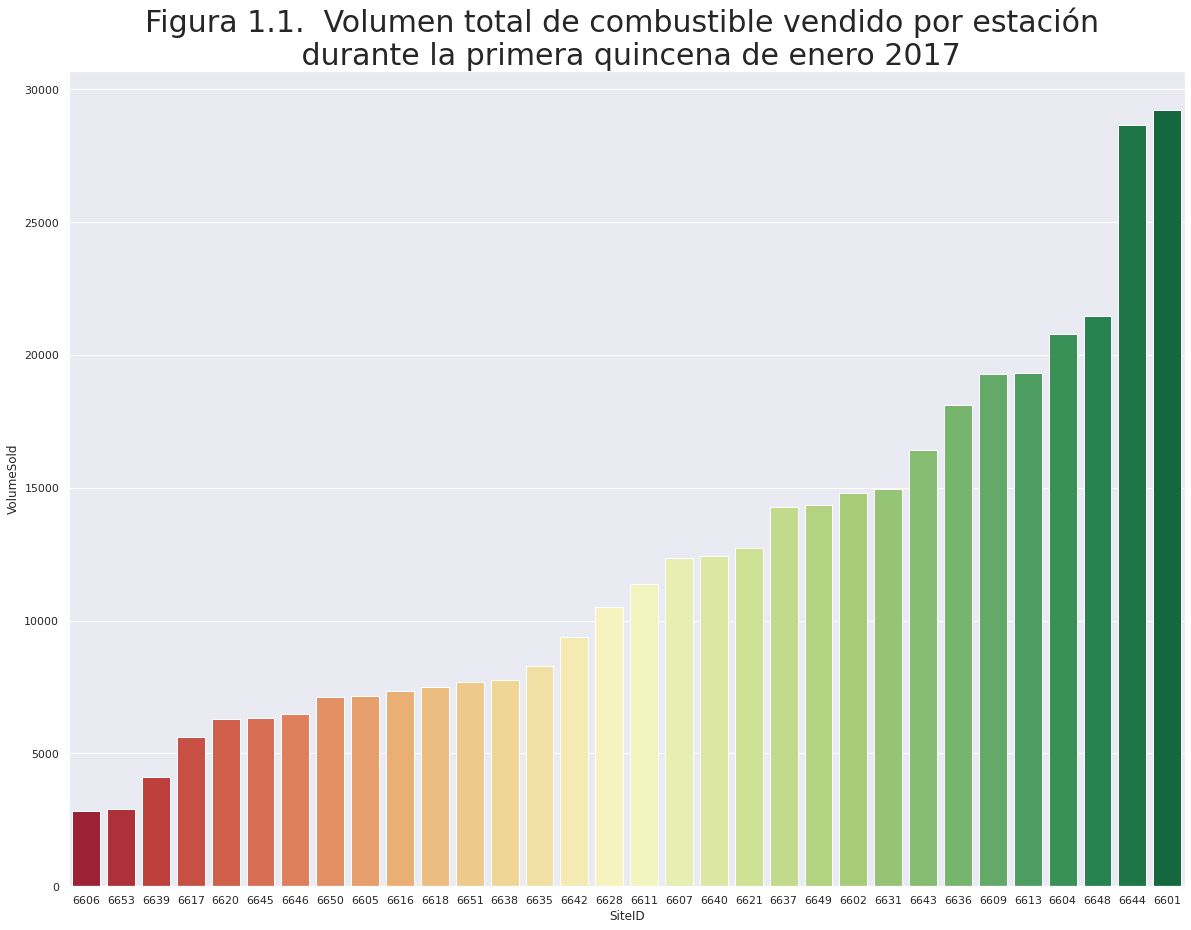

In [9]:
seaborn.set()
plt.subplots(figsize=(20,15))
plt.title('Figura 1.1.  Volumen total de combustible vendido por estación '
          '\n durante la primera quincena de enero 2017', fontsize=30)
seaborn.barplot(x='SiteID', y='VolumeSold', data=df1, order=df1['SiteID'], palette='RdYlGn')

Text(0.5, 1.0, 'Figura 1.2.  Volumen total de combustible vendido por estación \n durante la primera quincena de enero 2017 según grado')

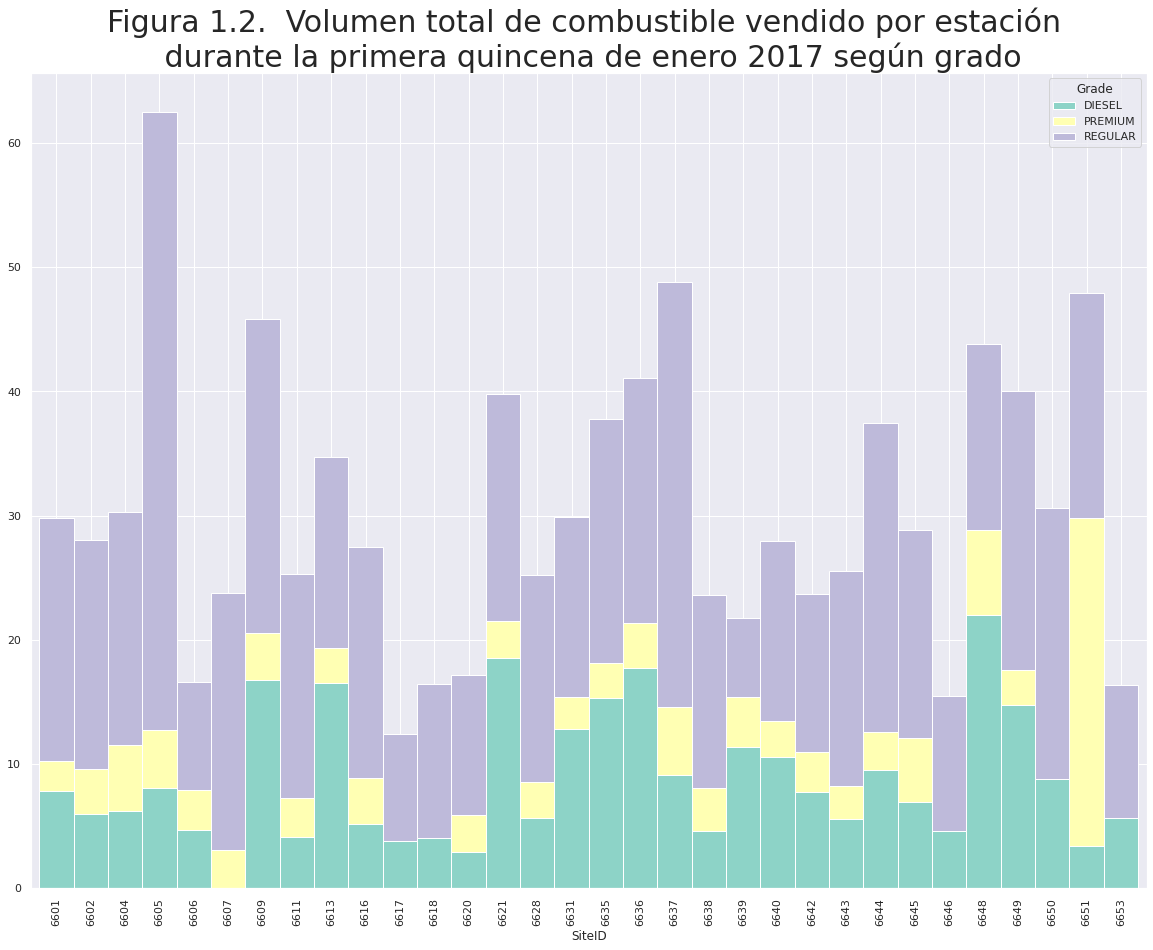

In [10]:
pt = df.pivot_table(index='SiteID', columns='Grade', values='VolumeSold')
seaborn.set(palette='Set3')
pt.plot(kind='bar', stacked=True, figsize=(20,15), width=1)
plt.title('Figura 1.2.  Volumen total de combustible vendido por estación '
          '\n durante la primera quincena de enero 2017 según grado', fontsize=30)

Muestre los precios promedio de combustible regular para cada estación en una gráfica 
de barras comparativa. 

In [11]:
df2 = df.groupby(['Grade']).get_group('REGULAR')
df2.head()

,Date,Weekday,Hour,SiteID,SiteName,Grade,Pump,ServiceType,VolumeSold,PaymentType,UnitPrice,TotalSale
0,2017-01-01,7,0,6601,Falls Church,REGULAR,1,FULL,7.40,CASH,2.78,20.57
1,2017-01-01,7,0,6601,Falls Church,REGULAR,3,FULL,11.03,CASH,2.78,30.66
2,2017-01-01,7,0,6601,Falls Church,REGULAR,5,FULL,11.70,CREDIT CARD,2.78,32.53
3,2017-01-01,7,0,6601,Falls Church,REGULAR,7,SELF,15.68,CASH,2.73,42.81
5,2017-01-01,7,1,6601,Falls Church,REGULAR,1,FULL,5.19,CREDIT CARD,2.78,14.43


In [12]:
df3 = df2.groupby(['SiteID'])[['UnitPrice']].aggregate(np.average).reset_index().sort_values('UnitPrice')

Text(0.5, 1.0, 'Figura 2.  Precio promedio de combustible grado regular según estación \n durante la primera quincena de enero 2017')

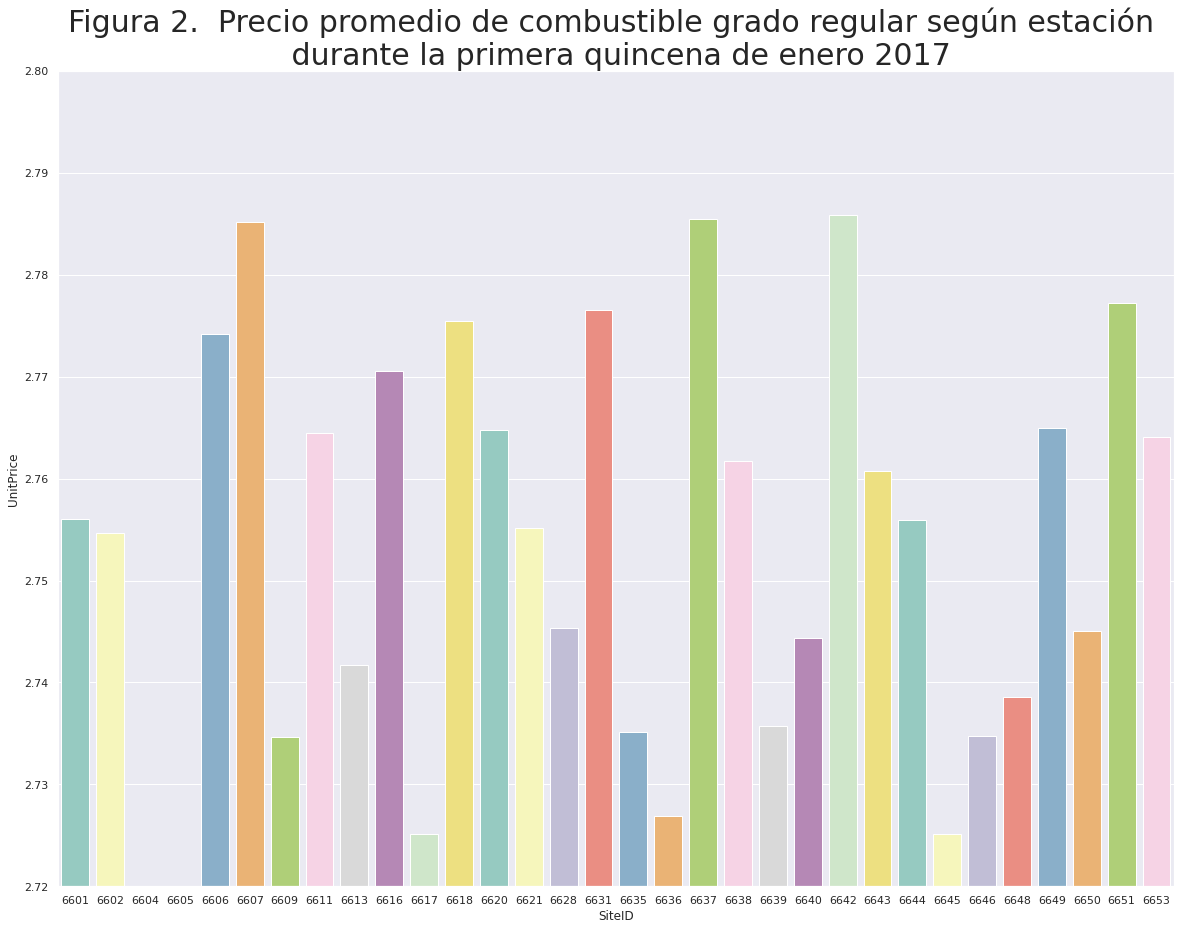

In [13]:
seaborn.set()
plt.subplots(figsize=(20,15))
plt.ylim(2.72, 2.8)
seaborn.barplot(x='SiteID', y='UnitPrice', data=df3, capsize=0.5, palette='Set3')
plt.title('Figura 2.  Precio promedio de combustible grado regular según estación '
          '\n durante la primera quincena de enero 2017', fontsize=30)

Text(0.5, 1.0, 'Figura 2.  Precio promedio de combustible grado regular según estación \n durante la primera quincena de enero 2017')

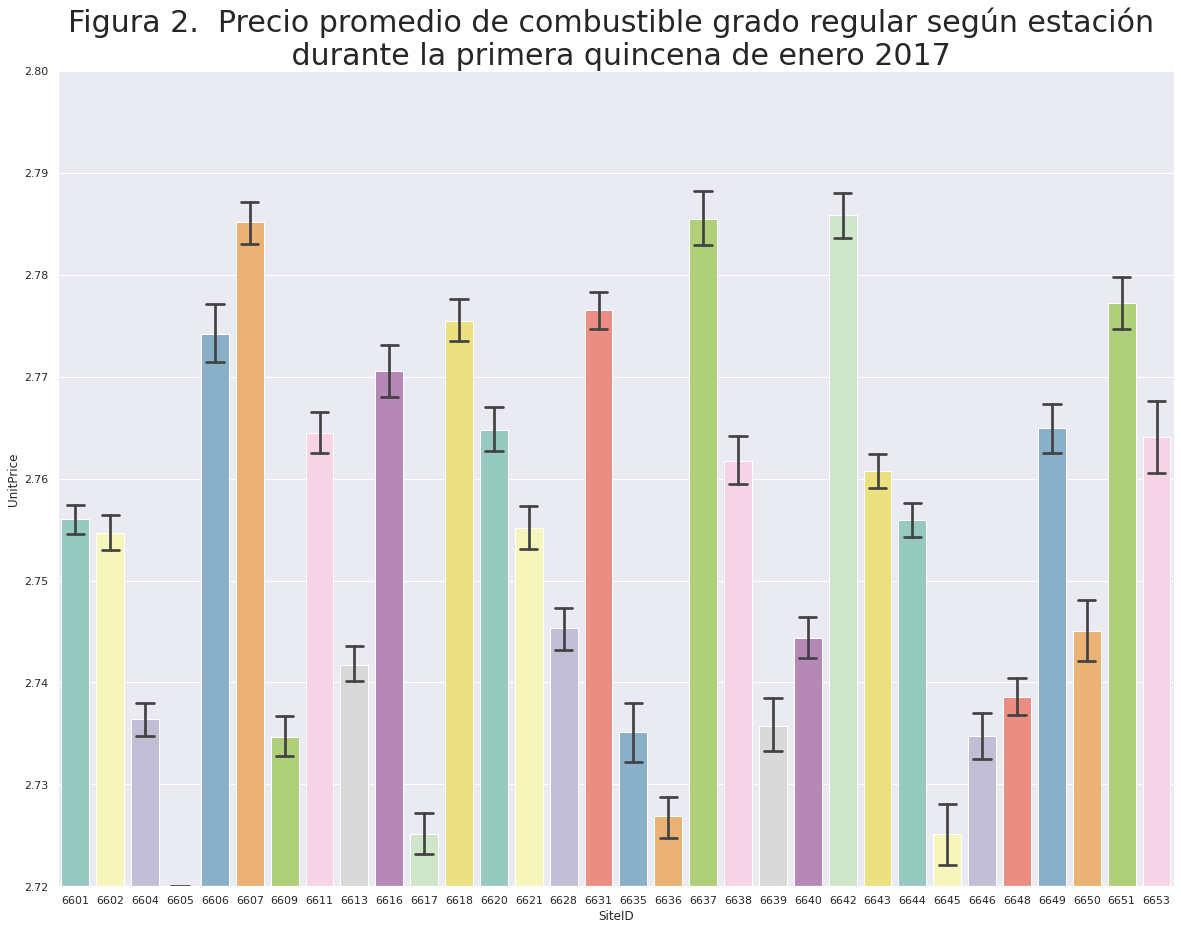

In [14]:
# with error bar
df4 = df.groupby('Grade').get_group('REGULAR')

seaborn.set()
plt.subplots(figsize=(20,15))
plt.ylim(2.72, 2.8)
seaborn.barplot(x='SiteID', y='UnitPrice', data=df4, capsize=0.5, palette='Set3')
plt.title('Figura 2.  Precio promedio de combustible grado regular según estación '
          '\n durante la primera quincena de enero 2017', fontsize=30)

Averigüe cómo varían diariamente los precios de combustible regular en la estación 6601. 

Text(0.5, 1.0, 'Figura 3. Cambio de precios de Combustible grado Regular a lo largo del tiempoen la estación #6601')

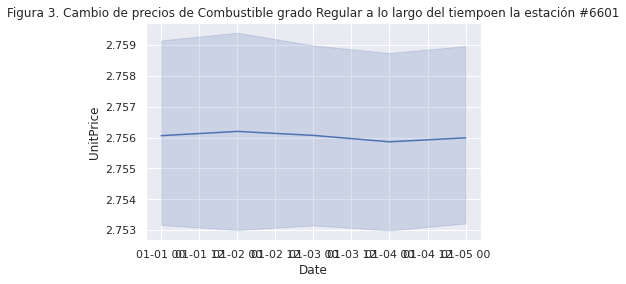

In [15]:
df5 = df2.groupby(['SiteID']).get_group(6601)
seaborn.lineplot(x='Date',y='UnitPrice',data=df5)
plt.title('Figura 3. Cambio de precios de Combustible grado Regular a lo largo del tiempoen la estación #6601')

Determine cómo varían los volúmenes por día de la semana. Compárelos con una gráfica 
de barras. Son los mismos para todas las estaciones? Se vende más durante la semana o en 
fin de semana?

In [16]:
df6 = df.groupby(['SiteID','Weekday'])[['VolumeSold']].aggregate(np.sum).reset_index().sort_values('Weekday')

Text(0.5, 1.0, 'Figura 4.1  Variación de volumenes de venta durante los días de la semana')

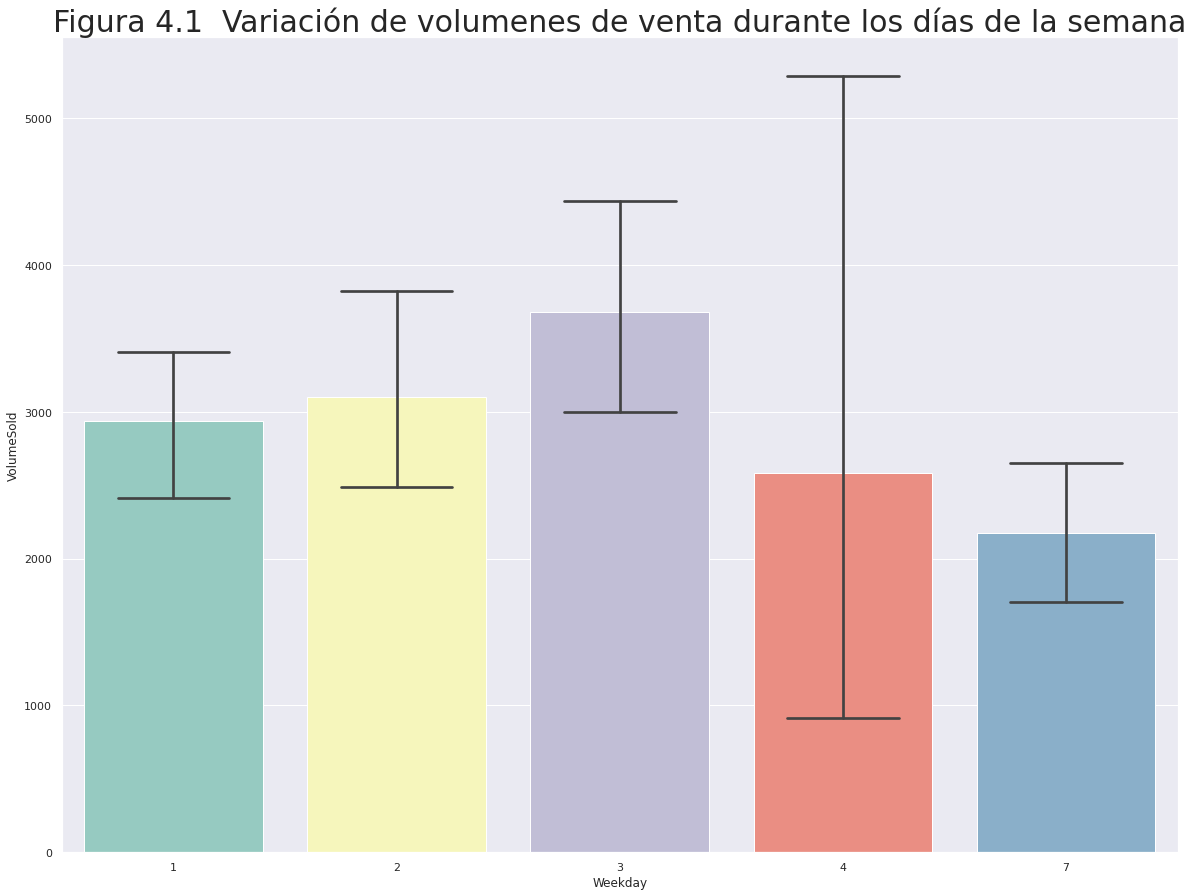

In [19]:
seaborn.set()
plt.subplots(figsize=(20,15))
seaborn.barplot(x='Weekday', y='VolumeSold', data=df6, capsize=0.5, palette='Set3')
plt.title('Figura 4.1  Variación de volumenes de venta durante los días de la semana', fontsize=30)

Text(0.5, 1.0, 'Figura 4.2  Variación de volumenes de venta en las estaciones')

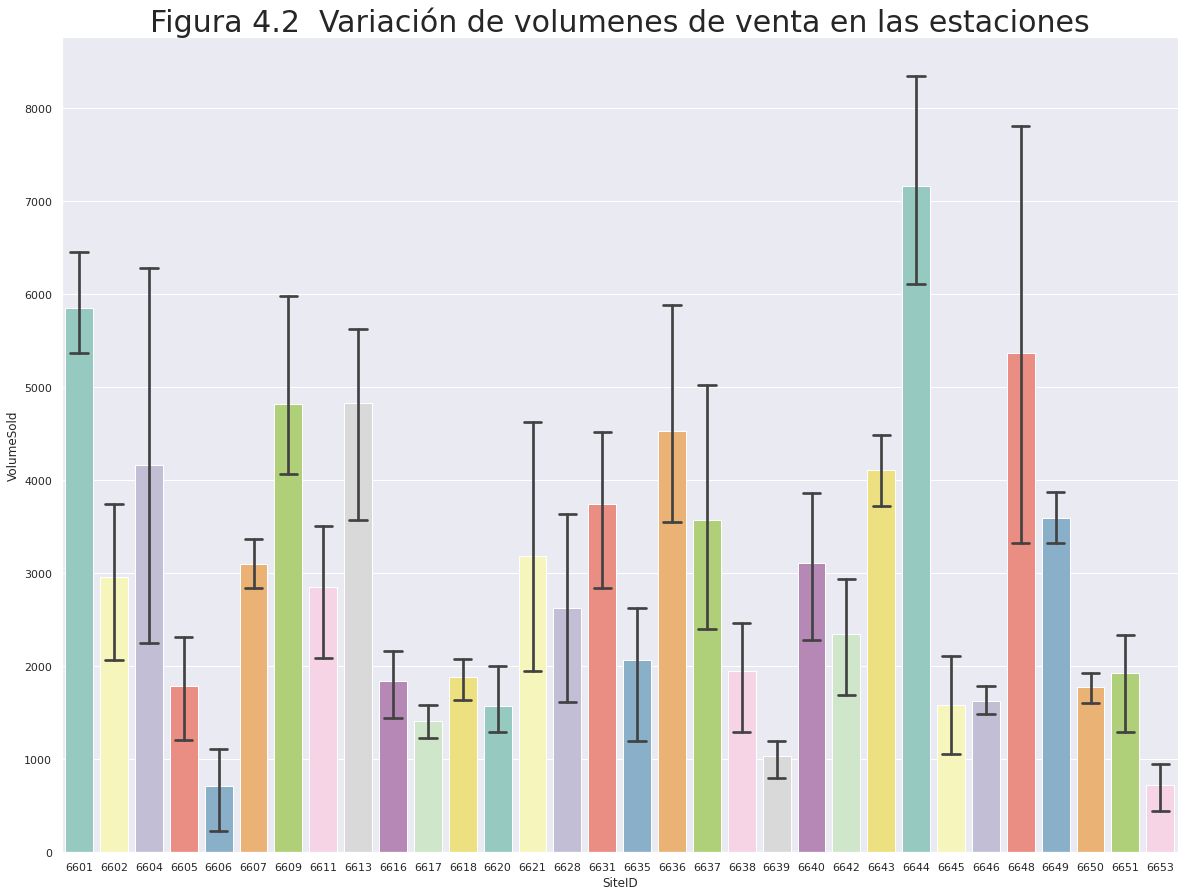

In [20]:
seaborn.set()
plt.subplots(figsize=(20,15))
seaborn.barplot(x='SiteID', y='VolumeSold', data=df6, capsize=0.5, palette='Set3')
plt.title('Figura 4.2  Variación de volumenes de venta en las estaciones', fontsize=30)

En dónde se dan más casos de “Drive Off”? Son todos los casos normales?

In [25]:
df7 = df.groupby(['PaymentType']).get_group('DRIVE OFF')
df7.head()

,Date,Weekday,Hour,SiteID,SiteName,Grade,Pump,ServiceType,VolumeSold,PaymentType,UnitPrice,TotalSale
14927,2017-01-03,2,17,6618,Quincy Drive,DIESEL,2,SELF,14.52,DRIVE OFF,2.89,41.96


In [27]:
df8 = df7.groupby(['SiteID'])[['VolumeSold']].aggregate(np.sum).reset_index().sort_values('VolumeSold')
df8.head()

,SiteID,VolumeSold
0,6618,14.52


Text(0.5, 1.0, 'Figura 5.  Volumenes de venta de gasolina con el tipo de pago Drive Off en las estaciones')

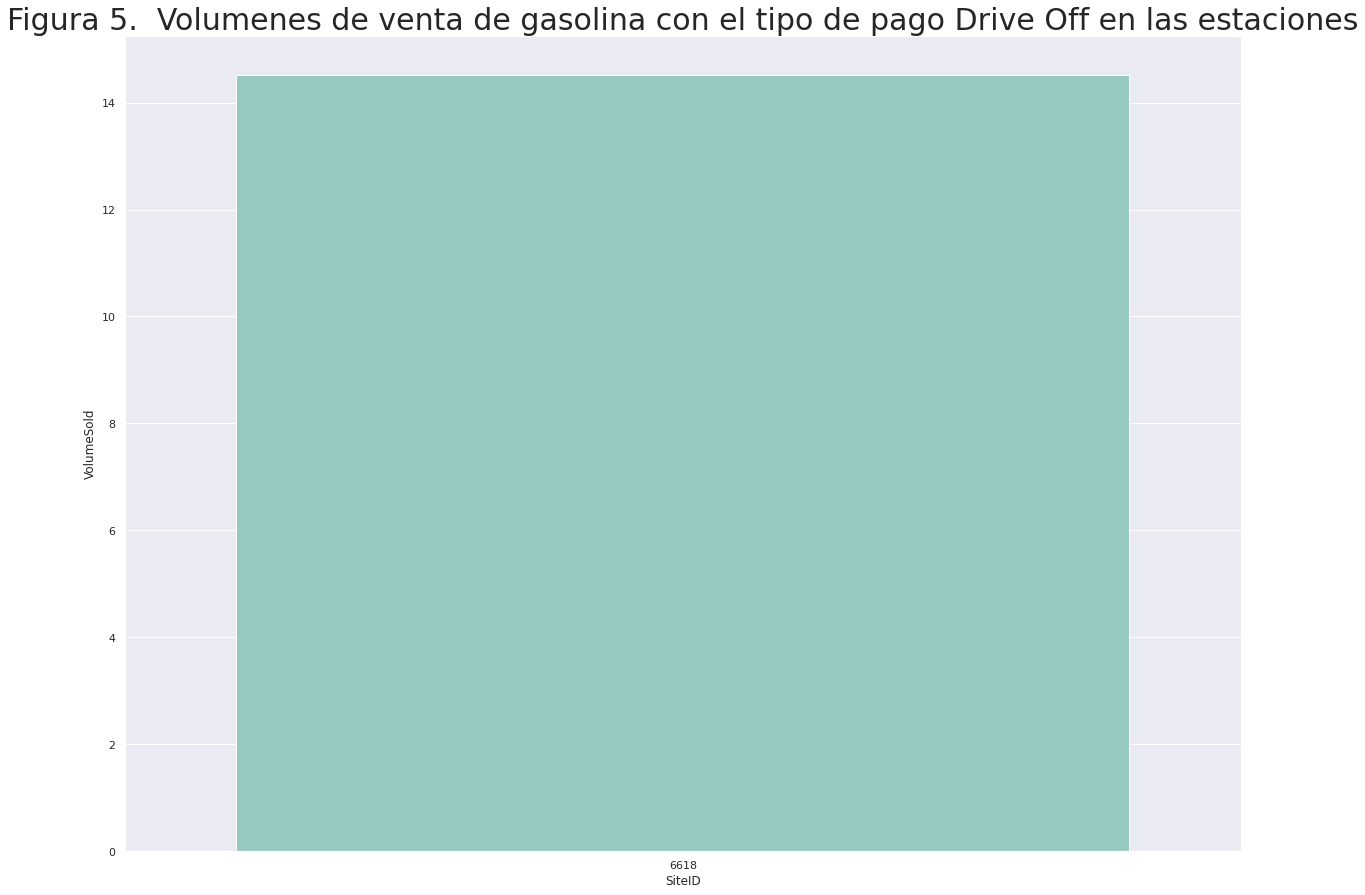

In [23]:
seaborn.set()
plt.subplots(figsize=(20,15))
seaborn.barplot(x='SiteID', y='VolumeSold', data=df8, capsize=0.5, palette='Set3')
plt.title('Figura 5.  Volumenes de venta de gasolina con el tipo de pago Drive Off en las estaciones', fontsize=30)

 Hay algo más que pueda determinar sobre los datos? 

 Voy a determinar las ventas totales de cada tipo de gasolina

In [34]:
df9 = df.groupby(["Grade"])[['VolumeSold']].aggregate(np.sum).reset_index().sort_values('VolumeSold')
df9.head()

,Grade,VolumeSold
1,PREMIUM,10775.07
0,DIESEL,78635.57
2,REGULAR,298659.84


Text(0.5, 1.0, 'Figura 6  Ventas totales por tipo de gasolina')

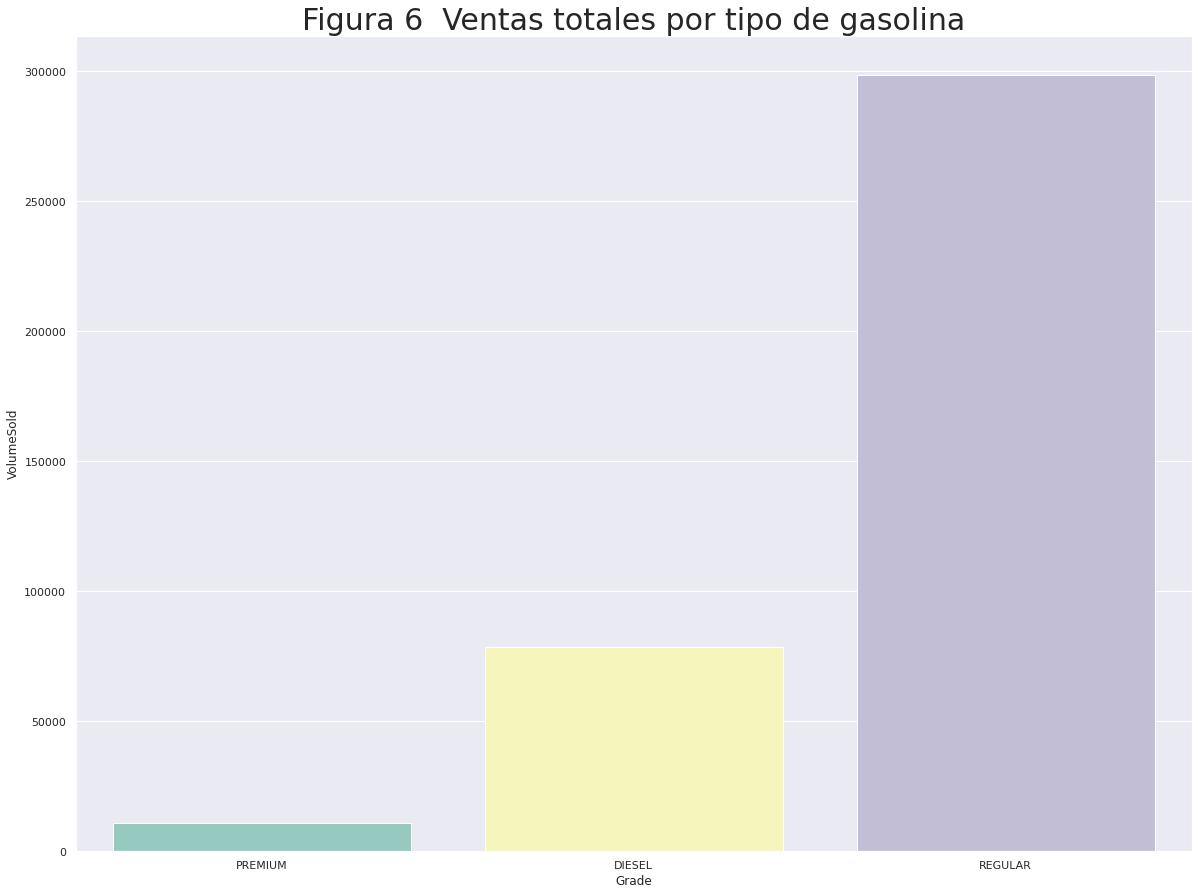

In [36]:
seaborn.set()
plt.subplots(figsize=(20,15))
seaborn.barplot(x='Grade', y='VolumeSold', data=df9, capsize=0.5, palette='Set3')
plt.title('Figura 6  Ventas totales por tipo de gasolina', fontsize=30)